In [1]:
import tsfresh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_hdf('data/features/achat_1_eff.h5')
y = pd.read_hdf('data/features/achat_y.h5')

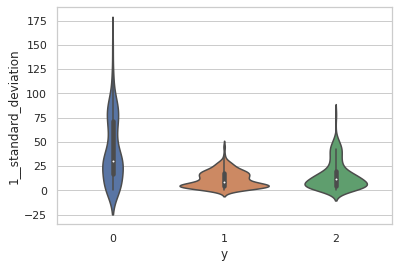

In [25]:
df = X.join(y)
df['y'] = df['y'].astype('category')
sns.set(style="whitegrid")
ax = sns.violinplot(x="y", y="1__standard_deviation", data=df)
fig = ax.get_figure()
fig.savefig('reports/figures/violinplot.png')

In [23]:
p_values = pd.read_hdf('data/p_values.h5')
df = p_values

In [34]:
df = df.drop(df[df['ach'].apply(lambda x: isinstance(x, str))].index)

In [56]:
from statsmodels.stats.multitest import multipletests

n_features = []
max_p = []
alpha = [0.001, 0.005, 0.01, 0.025, 0.05, 0.1]
for i in alpha:
    accept_0 = multipletests(df.iloc[:,0], method='fdr_by', alpha=i)[0]
    accept_1 = multipletests(df.iloc[:,1], method='fdr_by', alpha=i)[0]
    accept_2 = multipletests(df.iloc[:,2], method='fdr_by', alpha=i)[0]
    accept_all = accept_0*accept_1*accept_2
    relevant = df[accept_all]
    n_features.append(len(relevant))
    max_p.append(max(max(relevant['at']), max(relevant['baseline']), max(relevant['ach'])))


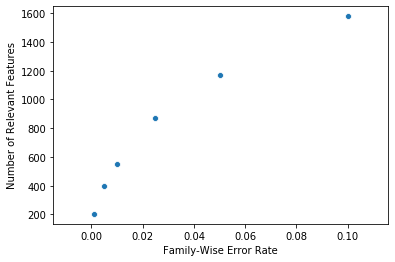

In [67]:
ax = sns.scatterplot(alpha,n_features)
ax.set_xlabel('Family-Wise Error Rate')
ax.set_ylabel('Number of Relevant Features')
fig = ax.get_figure()
fig.savefig('reports/figures/benjamini')

In [2]:
relevant = pd.read_hdf('../data/relevant_features.h5')
features = pd.read_hdf('../data/achat_filtered.h5')

In [3]:
X_0 = pd.read_hdf('../data/features/6000/ach-at-hex_6000_0_eff.h5')